In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering as AC
from yellowbrick.cluster import KElbowVisualizer

In [4]:
# ---------------------- DATA PREPROCESSING -----------------------------------------
# Only 2021 data

data = pd.read_csv(r"C:\Users\Mugdha\Downloads\Crimes_-_2001_to_Present.csv");
data = data.drop(columns=['Case Number', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude'])
print('--------------- Unecessary Columns DROPPED ----------------------------------')
print(data.columns)
print(data.shape)
print()

print('--------------------- Initializing 2021 data -------------------------------')
data21 = data[data['Year'] >= 2021]
print(data21.columns)
print(data21.shape)
print('----------------------------------------------------------------------------')

del data

print('----------- Calculating seconds hour and month for the data --------------------')
data21['Date'] = pd.to_datetime(data21.Date) 
data21['date'] = [d.date() for d in data21['Date']] 
data21['month'] = [d.date().month for d in data21['Date']] 
data21['time'] = [d.time() for d in data21['Date']] 
data21['hour'] = [d.time().hour for d in data21['Date']] 
data21['time'] = data21['time'].astype(str) 

print('----------------------------------------------------------------------------')

print('------------------------- Normalizing data ---------------------------------')
data21['District'] = (data21['District'] - data21['District'].min())/(data21['District'].max()-data21['District'].min()) 
data21['hour'] = (data21['hour'] - data21['hour'].min())/(data21['hour'].max()-data21['hour'].min())
data21['month'] = (data21['month'] - data21['month'].min())/(data21['month'].max()-data21['month'].min())

print('----------------------------------------------------------------------------')

--------------- Unecessary Columns DROPPED ----------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(7442165, 14)

--------------------- Initializing 2021 data -------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(179768, 14)
----------------------------------------------------------------------------
----------- Calculating seconds hour and month for the data --------------------
----------------------------------------------------------------------------
------------------------- Normalizing data ---------------------------------
----------------------------------------------------------------------------


In [46]:
def zscorenorm(df):
    return (df - df.mean(axis=0)) / df.std(axis=0)

In [34]:
def plotElbowCurve(X):
    model = AC()
    visualizer = KElbowVisualizer(model, k=(4,10), metric='calinski_harabasz', timings=False)
    visualizer.fit(X)
    visualizer.show()

In [8]:
hour_by_location = data21.pivot_table(values='ID', index='Location Description', columns=data21.hour, aggfunc=np.size).fillna(0)

In [9]:
hour_by_type = data21.pivot_table(values='ID', index='Primary Type', columns=data21.hour, aggfunc=np.size).fillna(0)

In [10]:
month_by_type = data21.pivot_table(values='ID', index='Primary Type', columns=data21.month, aggfunc=np.size).fillna(0)

In [11]:
district_crimeType = data21.pivot_table(values='ID', index='Primary Type', columns=data21.District, aggfunc=np.size).fillna(0)

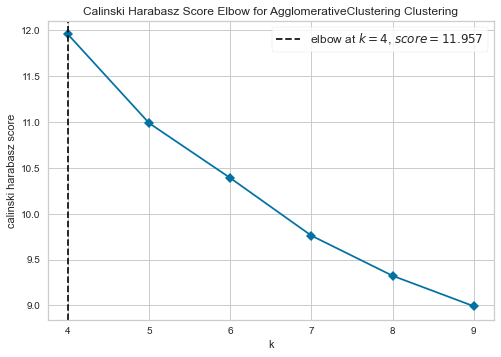

In [35]:
plotElbowCurve(zscorenorm(hour_by_location.T).T)

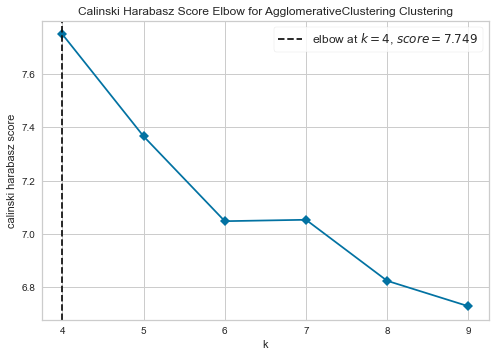

In [36]:
plotElbowCurve(zscorenorm(hour_by_type.T).T)

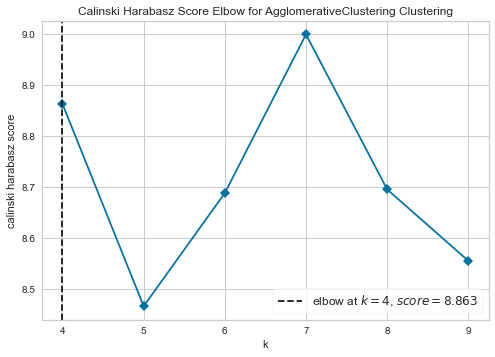

In [37]:
plotElbowCurve(zscorenorm(month_by_type.T).T)

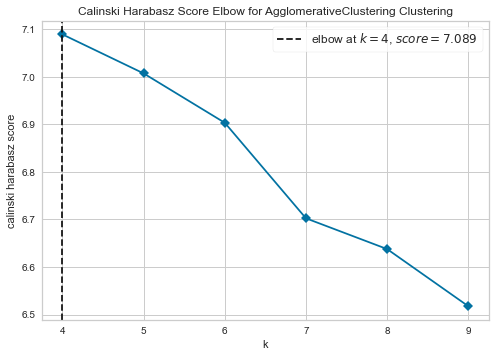

In [38]:
plotElbowCurve(zscorenorm(district_crimeType.T).T)

In [64]:
def agg_clustering(df):
    scaled_data = scale_df(df.T).T
    agg_fit = AC(4).fit(scaled_data).labels_.argsort()
    limit = np.min([np.max(scaled_data.to_numpy()), 
                  np.abs(np.min(scaled_data.to_numpy()))])
    scaled_data = np.clip(scaled_data, -1*limit, limit)

    plt.imshow(scaled_data.iloc[agg_fit,:], cmap='YlOrRd')
    plt.colorbar(fraction=0.03)
    plt.xticks(np.arange(scaled_data.shape[1]))
    plt.yticks(np.arange(scaled_data.shape[0]), scaled_data.index[agg_fit])
    plt.grid(False)
    plt.show()

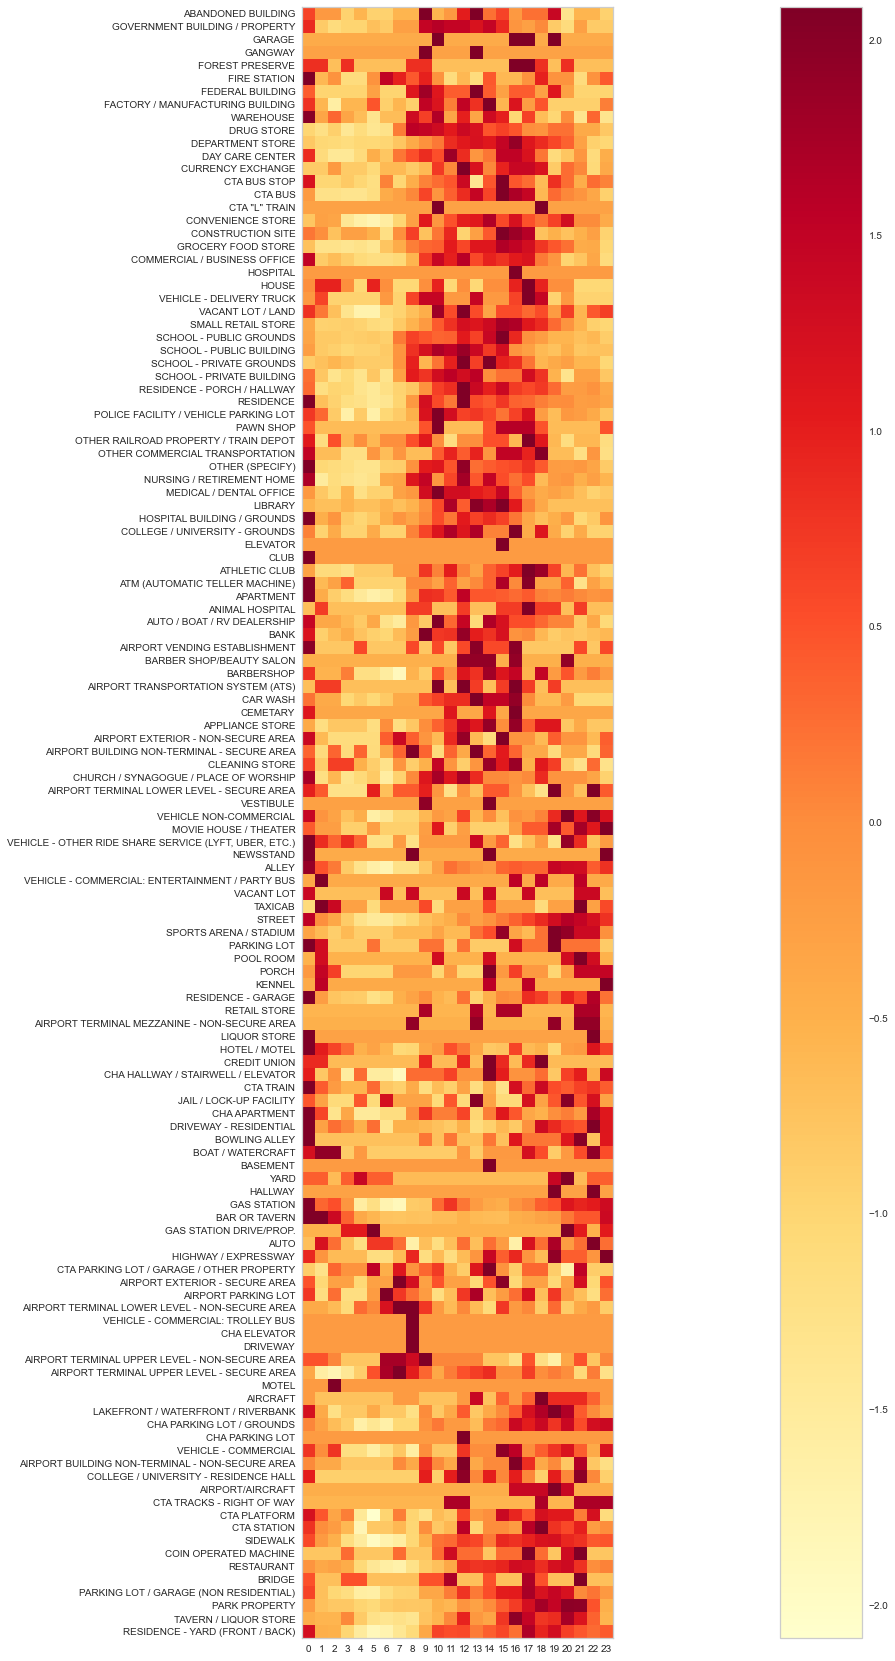

In [65]:
#Finding out patterns between the locations of the crime and the time of day

plt.figure(figsize=(60,30))
agg_clustering(hour_by_location)

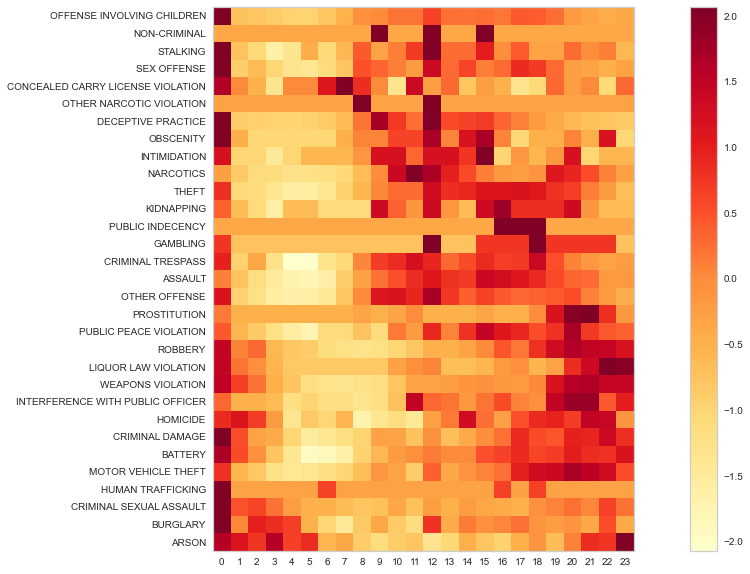

In [66]:
#Finding out patterns between the type of the crime and the time of day

plt.figure(figsize=(20, 10))
agg_clustering(hour_by_type)

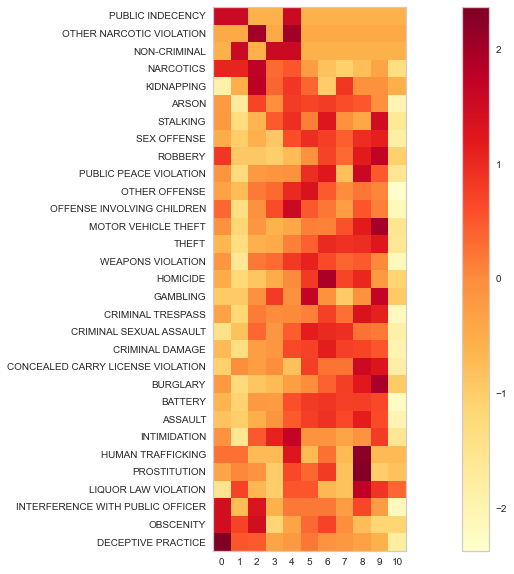

In [67]:
#Finding out patterns between the types of the crimes and the months when they have occured

plt.figure(figsize=(20, 10))
agg_clustering(month_by_type)

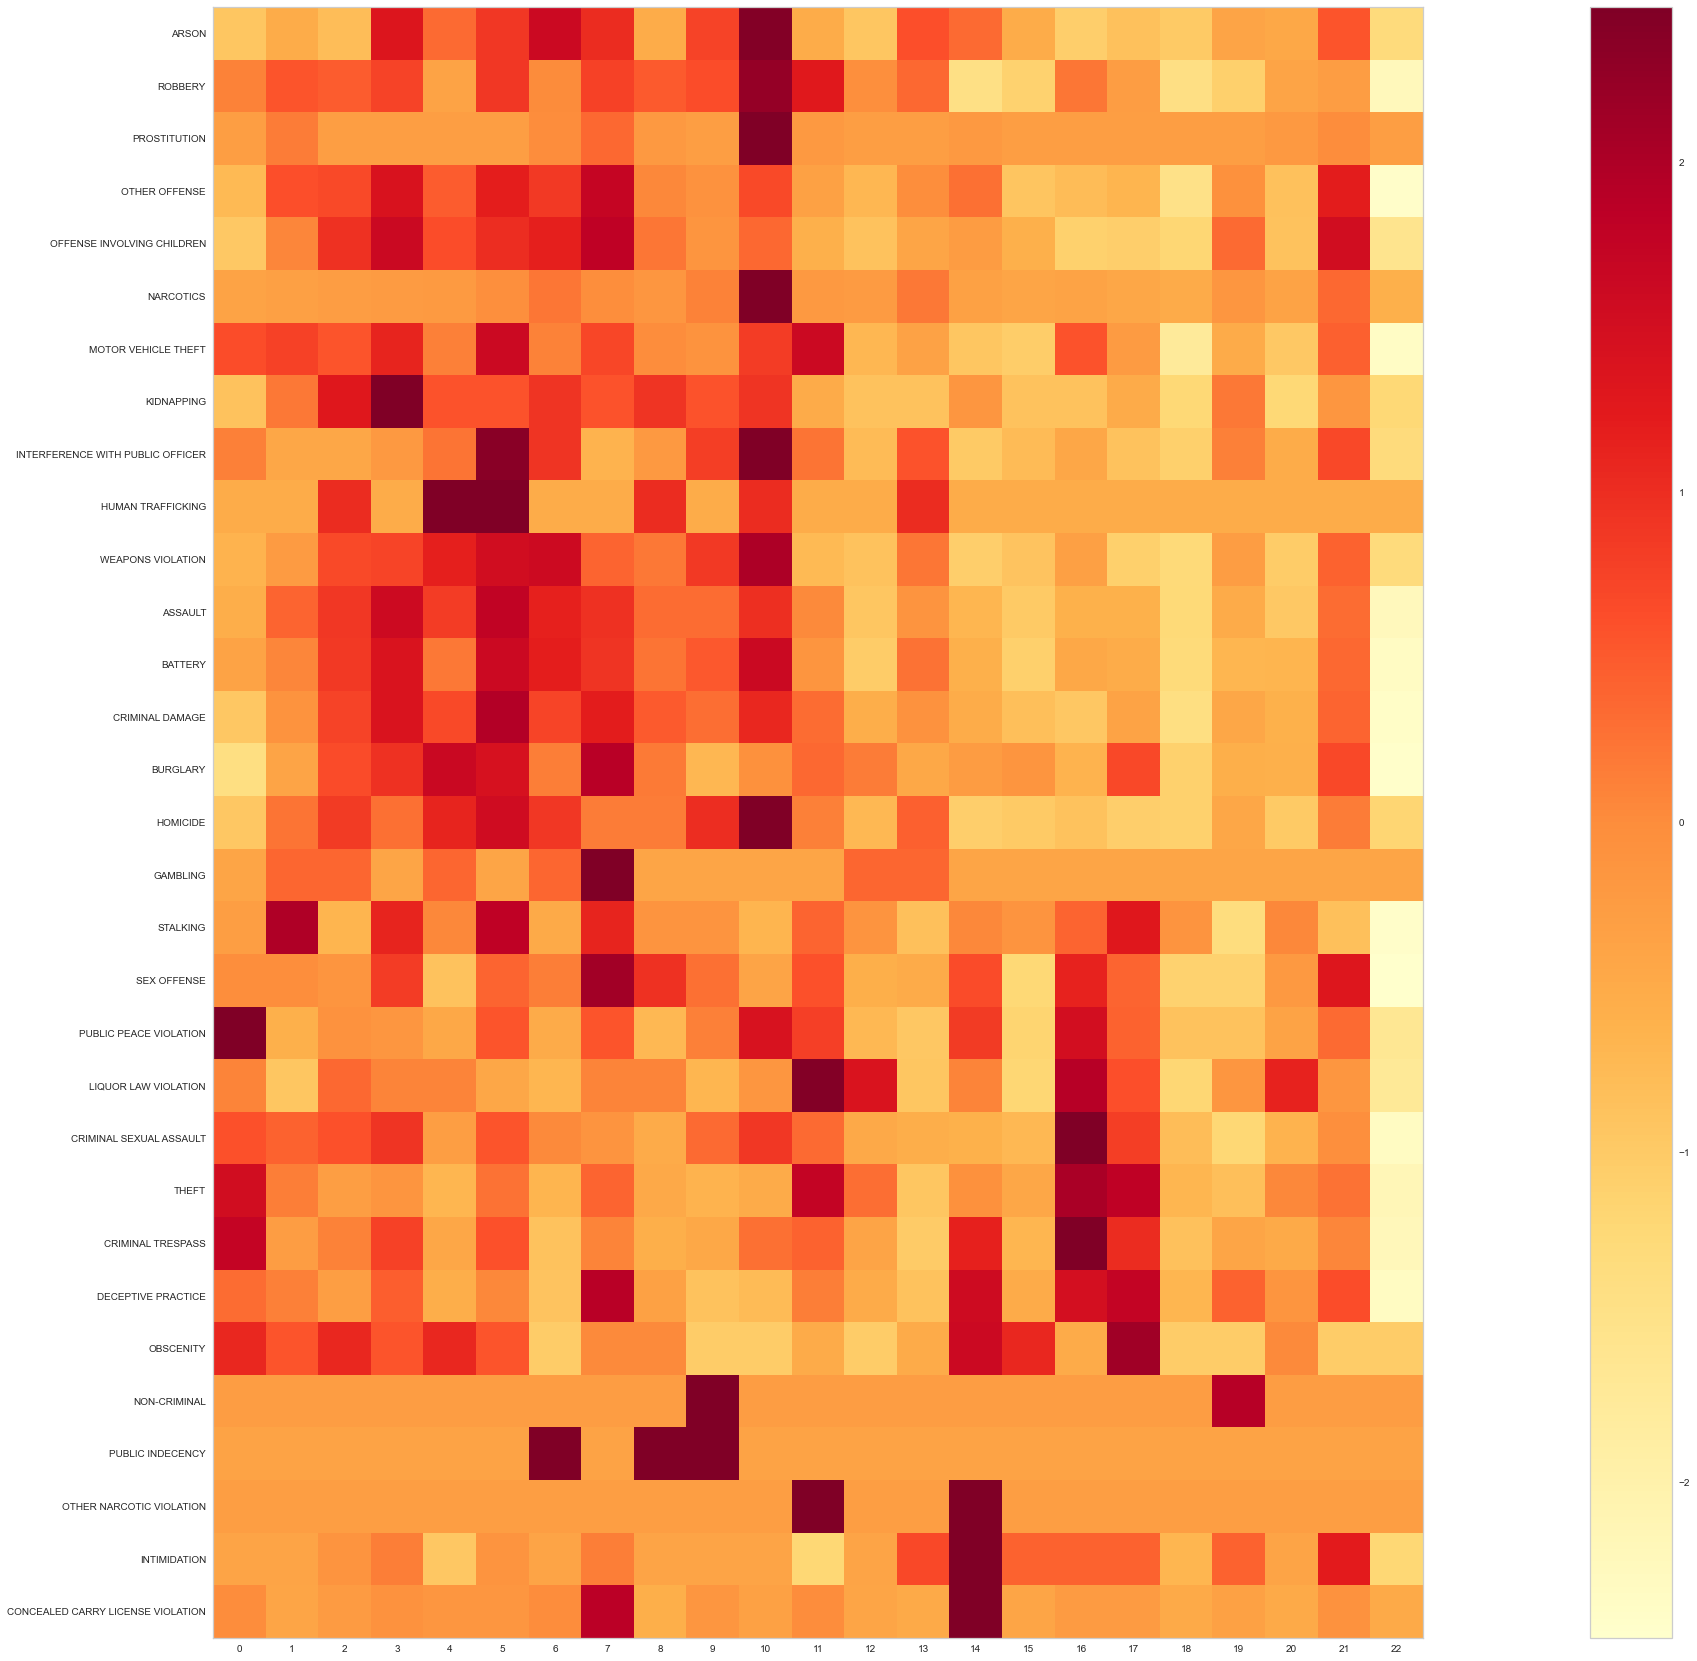

In [68]:
#Finding out patterns between the types of the crime and the districts

plt.figure(figsize=(60,30))
agg_clustering(district_crimeType)